# Regression Challenge
### Author: Sabine Hollatz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df_train = pd.read_csv('train_data.csv')
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  4058200630  20141002T000000         3       1.75         2190      7021   
1  3613600150  20150105T000000         3       2.50         2370      6840   
2  7170200080  20140617T000000         2       1.00         1230      3800   
3  9542300530  20141124T000000         4       2.25         2510      9963   
4  3626039028  20140818T000000         3       1.00         1160      7491   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0     1.0           0     2          4  ...        1390            800   
1     2.0           0     0          3  ...        2370              0   
2     1.0           0     0          3  ...        1230              0   
3     1.0           0     0          4  ...        2200            310   
4     1.0           0     0          4  ...        1160              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1953             0    98178  47.5033 -122.232           2180   
1      1987             0    98119  47.6503 -122.366           1590   
2      1928             0    98115  47.6797 -122.292           1610   
3      1967             0    98005  47.5973 -122.177           3110   
4      1917             0    98177  47.7024 -122.359           1800   

   sqft_lot15   price  
0        7155  353000  
1        4400  300523  
2        3800  435000  
3        9963  800000  
4        2267  417500  

[5 rows x 21 columns]

In [3]:
df_val = pd.read_csv('val_data.csv')
df_val = df_val.drop('Unnamed: 0', axis=1)
df_val.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  1310430130  20141009T000000         4       2.75         2790      6600   
1  2540830020  20150401T000000         3       2.25         1630      6449   
2  8835770330  20140819T000000         2       1.50         2370    184231   
3  7732400490  20141105T000000         4       2.50         2270      7665   
4     2800031  20150401T000000         3       1.00         1430      7599   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     2.0           0     0          3      9        2790              0   
1     1.0           0     0          3      7        1310            320   
2     2.0           0     0          3     11        2370              0   
3     2.0           0     0          3      9        2270              0   
4     1.5           0     0          4      6        1010            420   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2000             0    98058  47.4362 -122.109           2900   
1      1986             0    98011  47.7275 -122.232           1620   
2      2005             0    98045  47.4543 -121.778           3860   
3      1986             0    98052  47.6612 -122.148           2450   
4      1930             0    98168  47.4783 -122.265           1290   

   sqft_lot15  
0        6752  
1        7429  
2      151081  
3        8706  
4       10320

In [4]:
df_train.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [5]:
df_train.isnull().count()

id               17290
date             17290
bedrooms         17290
bathrooms        17290
sqft_living      17290
sqft_lot         17290
floors           17290
waterfront       17290
view             17290
condition        17290
grade            17290
sqft_above       17290
sqft_basement    17290
yr_built         17290
yr_renovated     17290
zipcode          17290
lat              17290
long             17290
sqft_living15    17290
sqft_lot15       17290
price            17290
dtype: int64

In [6]:
df_train.isna().count()

id               17290
date             17290
bedrooms         17290
bathrooms        17290
sqft_living      17290
sqft_lot         17290
floors           17290
waterfront       17290
view             17290
condition        17290
grade            17290
sqft_above       17290
sqft_basement    17290
yr_built         17290
yr_renovated     17290
zipcode          17290
lat              17290
long             17290
sqft_living15    17290
sqft_lot15       17290
price            17290
dtype: int64

There are no missing values in the dataset.

### Attribute Distributions

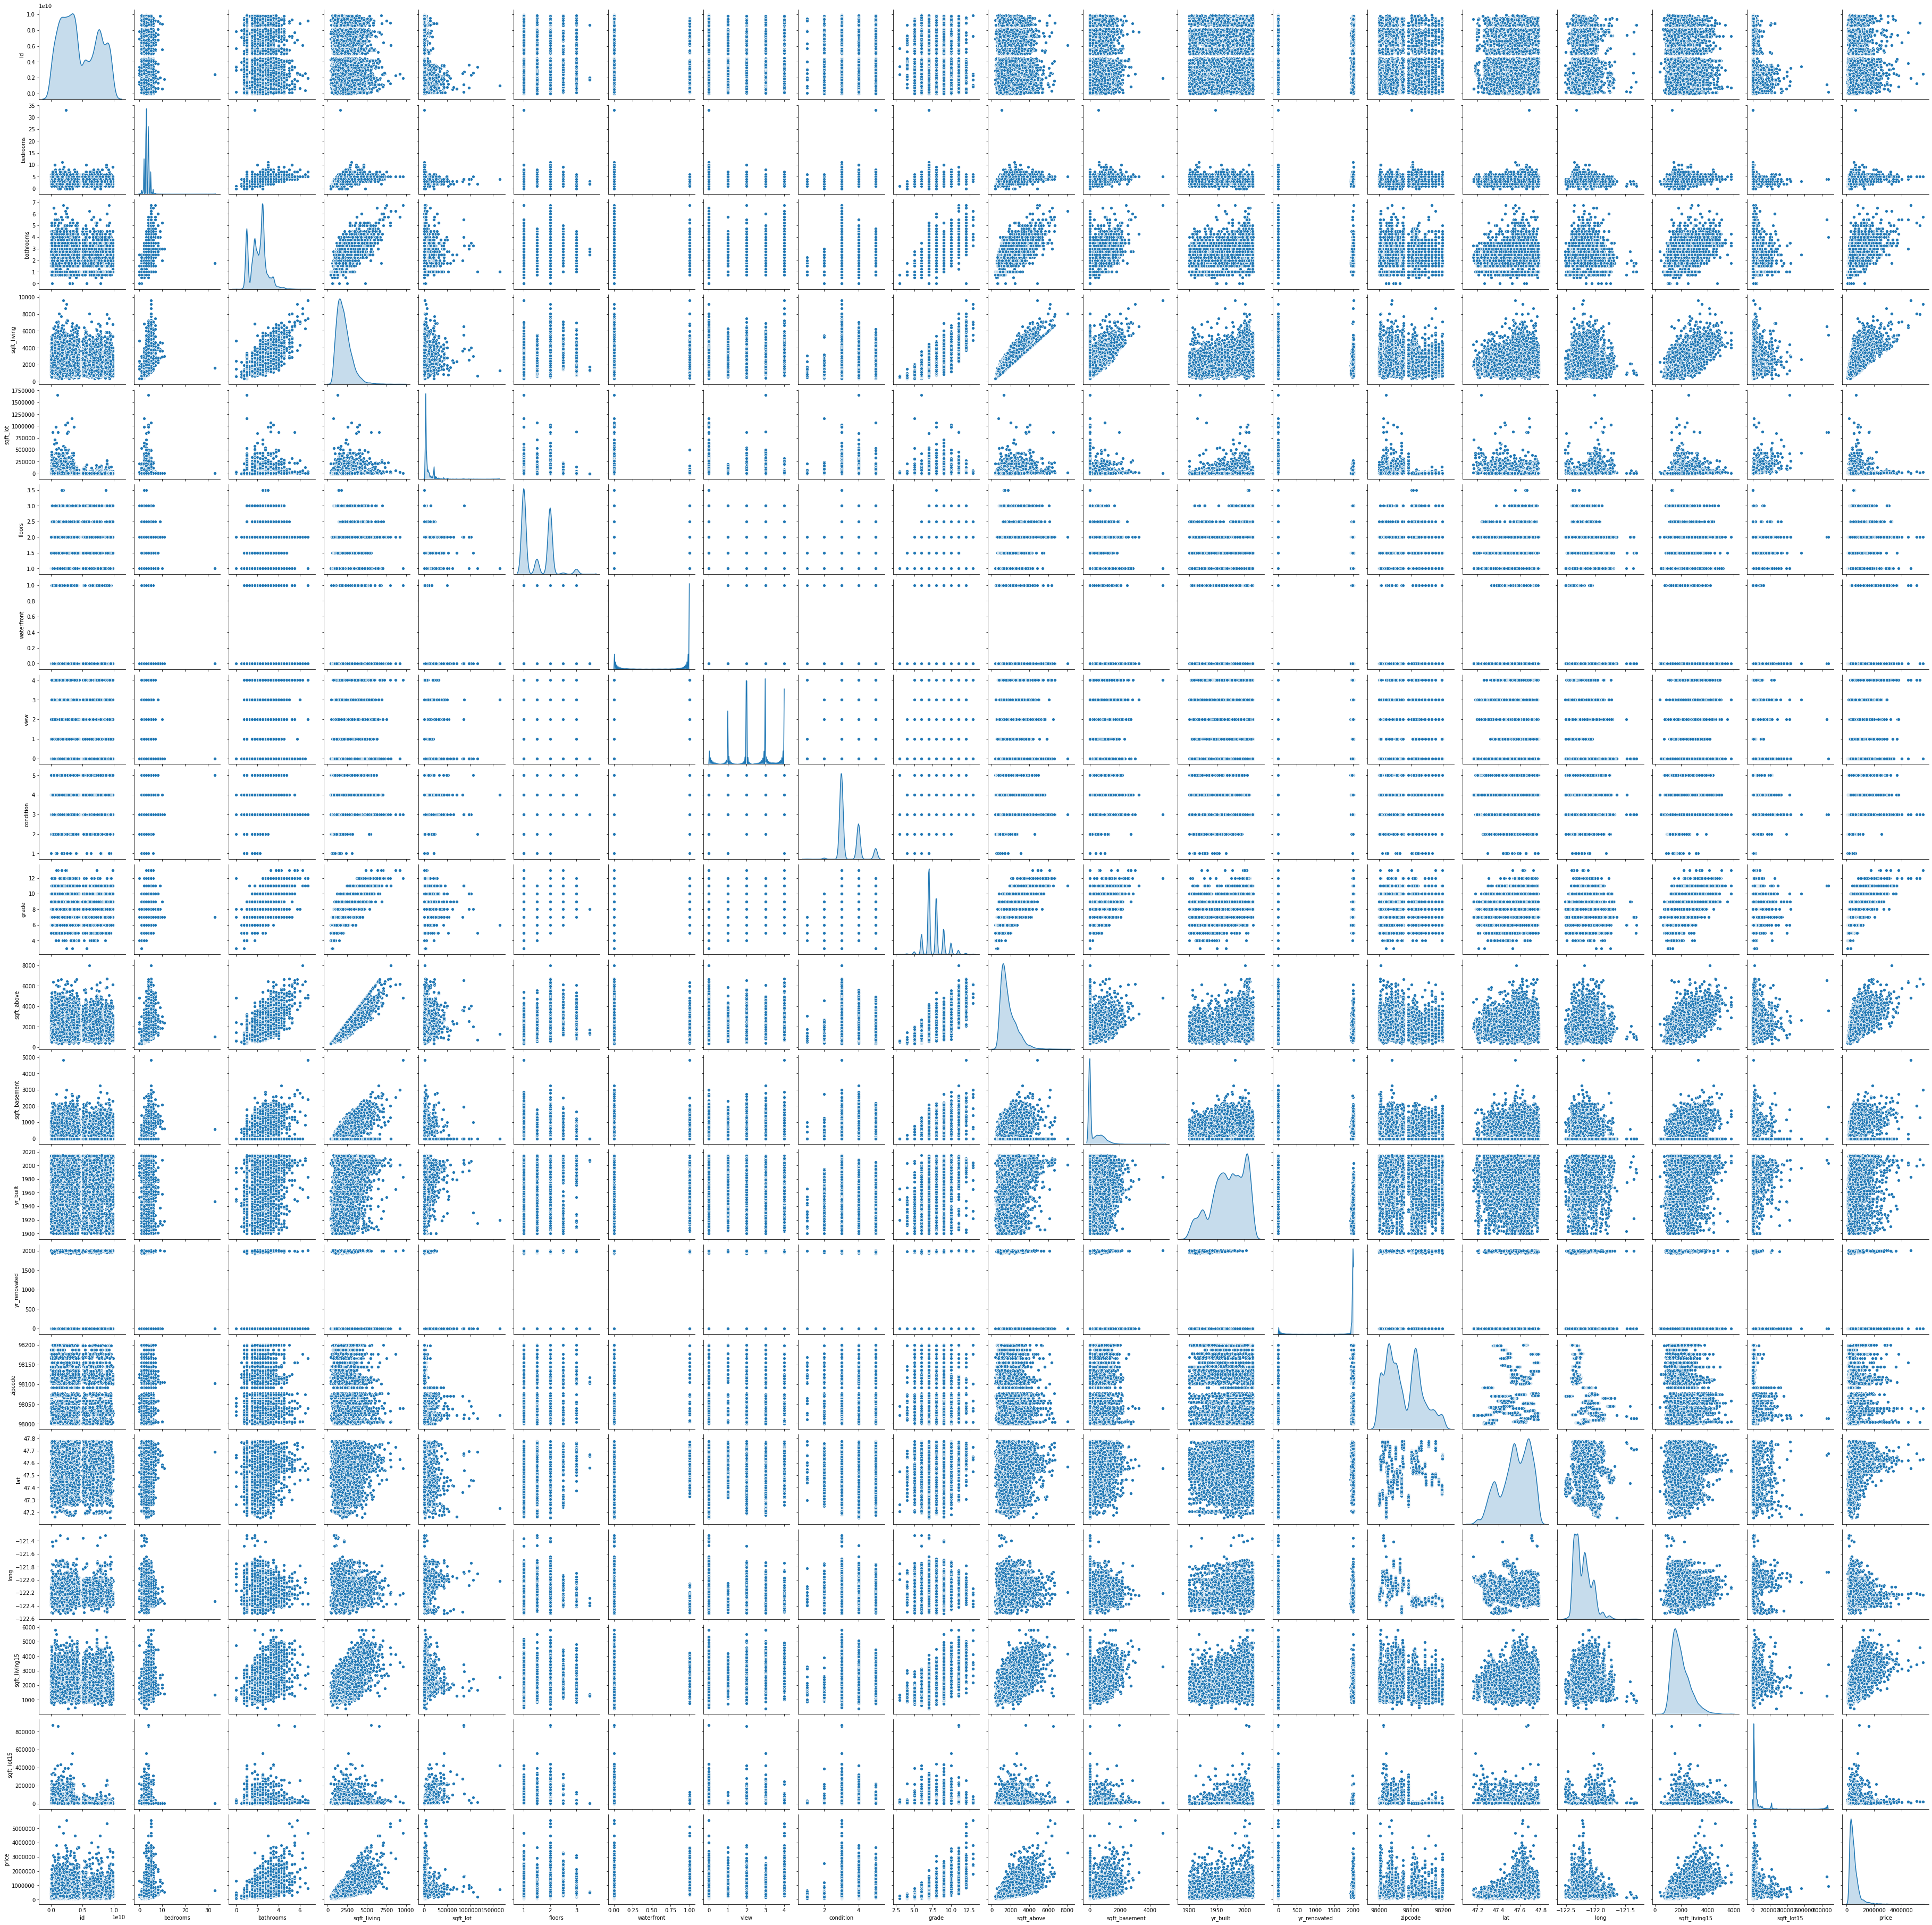

In [7]:
sns.pairplot(df_train, diag_kind='kde')

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_train.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      17290.000 17290.000  17290.000    17290.000   17290.000 17290.000   
mean  4577035478.512     3.366      2.112     2074.586   15210.985     1.494   
std   2877096526.638     0.934      0.765      903.772   42829.885     0.540   
min      1000102.000     0.000      0.000      370.000     520.000     1.000   
25%   2122784848.000     3.000      1.500     1420.000    5040.000     1.000   
50%   3904921185.000     3.000      2.250     1920.000    7605.000     1.500   
75%   7308600032.500     4.000      2.500     2550.000   10630.750     2.000   
max   9900000190.000    33.000      6.750     9640.000 1651359.000     3.500   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count   17290.000 17290.000  17290.000 17290.000   17290.000      17290.000   
mean        0.008     0.234      3.411     7.656    1782.822        291.764   
std         0.088     0.764      0.651     1.173     816.765        441.082   
min         0.000     0.000      1.000     3.000     370.000          0.000   
25%         0.000     0.000      3.000     7.000    1190.000          0.000   
50%         0.000     0.000      3.000     7.000    1560.000          0.000   
75%         0.000     0.000      4.000     8.000    2210.000        560.000   
max         1.000     4.000      5.000    13.000    8020.000       4820.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 17290.000     17290.000 17290.000 17290.000 17290.000      17290.000   
mean   1970.915        84.597 98078.058    47.560  -122.214       1984.131   
std      29.419       402.087    53.560     0.139     0.141        681.614   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1951.000         0.000 98033.000    47.470  -122.329       1490.000   
50%    1975.000         0.000 98065.000    47.571  -122.231       1840.000   
75%    1997.000         0.000 98118.000    47.678  -122.125       2360.000   
max    2015.000      2015.000 98199.000    47.778  -121.315       5790.000   

       sqft_lot15       price  
count   17290.000   17290.000  
mean    12790.232  537880.616  
std     27728.922  353979.837  
min       659.000   75000.000  
25%      5100.000  322000.000  
50%      7615.000  450000.000  
75%     10067.500  645000.000  
max    871200.000 5570000.000

### Outliers Detection

In [10]:
def outlierCheck(df, attr):
    outlier_indices = []
    outlier_values = []
    inlier_indices = []
    q1 = df[attr].quantile(.25)
    q3 = df[attr].quantile(.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for index, row in df.iterrows():
        if row[attr] > upper_bound:
            outlier_indices.append(index)
            outlier_values.append(row[attr])
        elif row[attr] < lower_bound:
            outlier_indices.append(index)
            outlier_values.append(row[attr])
        else:
            inlier_indices.append(index)
    return inlier_indices, outlier_indices, outlier_values

In [11]:
outliers = []
for feature in df_train.columns:
    inlier, outlier, _ = outlierCheck(df_train, feature)
    print("In df_train feature {} are {} outliers".format(feature, len(outlier)))
print("")

In df_train feature id are 0 outliers


TypeError: can't multiply sequence by non-int of type 'float'